# Race Data Analysis

Goal: Develop graphs of WR statistics of certain tracks over time
Test the hypothesis: World Record Times have been cut down as new racers become better than the racer before them

## Import Data and Modules

In [17]:
from numpy.ma.extras import unique

from DataFrameImport import *

import pandas as pd
import seaborn as sns

In [18]:
path = 'resources/pickled_tables/'
extension = '.plk'

race_data_table = 'race_data'
race_table = 'race'
circuit_table = 'circuit'

race_data_file = path + race_data_table + extension
race_file = path + race_table + extension
circuit_file = path + circuit_table + extension

race_data = pd.read_pickle(race_data_file)
race = pd.read_pickle(race_file)
circuit = pd.read_pickle(circuit_file)

In [19]:
race_data

,race_id,type,position_display_order,position_number,position_text,driver_number,driver_id,constructor_id,engine_manufacturer_id,tyre_manufacturer_id,...,fastest_lap_time_millis,fastest_lap_gap,fastest_lap_gap_millis,fastest_lap_interval,fastest_lap_interval_millis,pit_stop_stop,pit_stop_lap,pit_stop_time,pit_stop_time_millis,driver_of_the_day_percentage
0,290,PRE_QUALIFYING_RESULT,1,1.0,1,40,gilles-villeneuve,mclaren,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
1,290,PRE_QUALIFYING_RESULT,2,2.0,2,23,patrick-tambay,ensign,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
2,290,PRE_QUALIFYING_RESULT,3,3.0,3,34,jean-pierre-jarier,penske,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
3,290,PRE_QUALIFYING_RESULT,4,4.0,4,30,brett-lunger,mclaren,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
4,290,PRE_QUALIFYING_RESULT,5,5.0,5,38,brian-henton,march,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183627,1143,DRIVER_OF_THE_DAY_RESULT,1,1.0,1,14,fernando-alonso,aston-martin,mercedes,pirelli,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,22.5
183628,1143,DRIVER_OF_THE_DAY_RESULT,2,2.0,2,63,george-russell,mercedes,mercedes,pirelli,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,16.4
183629,1143,DRIVER_OF_THE_DAY_RESULT,3,3.0,3,1,max-verstappen,red-bull,honda-rbpt,pirelli,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,14.5
183630,1143,DRIVER_OF_THE_DAY_RESULT,4,4.0,4,4,lando-norris,mclaren,mercedes,pirelli,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,8.7


In [20]:
race

,id,year,round,date,time,grand_prix_id,official_name,qualifying_format,sprint_qualifying_format,circuit_id,...,qualifying_2_date,qualifying_2_time,qualifying_date,qualifying_time,sprint_qualifying_date,sprint_qualifying_time,sprint_race_date,sprint_race_time,warming_up_date,warming_up_time
0,1,1950,1,1950-05-13,None,great-britain,1950 RAC British Grand Prix,TWO_SESSION,None,silverstone,...,None,None,None,None,None,None,None,None,None,None
1,2,1950,2,1950-05-21,None,monaco,Grand Prix de Monaco 1950,TWO_SESSION,None,monaco,...,None,None,None,None,None,None,None,None,None,None
2,3,1950,3,1950-05-30,None,indianapolis,1950 Indianapolis 500,FOUR_LAPS,None,indianapolis,...,None,None,None,None,None,None,None,None,None,None
3,4,1950,4,1950-06-04,None,switzerland,Grosser Preis der Schweiz 1950,TWO_SESSION,None,bremgarten,...,None,None,None,None,None,None,None,None,None,None
4,5,1950,5,1950-06-18,None,belgium,1950 Belgian Grand Prix,TWO_SESSION,None,spa-francorchamps,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1145,2025,20,2025-10-26,20:00,mexico,Formula 1 Gran Premio de la Ciudad de México 2025,KNOCKOUT,None,mexico-city,...,None,None,2025-10-25,21:00,None,None,None,None,None,None
1145,1146,2025,21,2025-11-09,17:00,sao-paulo,Formula 1 MSC Cruises Grande Prêmio de São Pau...,KNOCKOUT,SPRINT_SHOOTOUT,interlagos,...,None,None,2025-11-08,18:00,2025-11-07,18:30,2025-11-08,14:00,None,None
1146,1147,2025,22,2025-11-23,04:00,las-vegas,Formula 1 Heineken Las Vegas Grand Prix 2025,KNOCKOUT,None,las-vegas,...,None,None,2025-11-22,04:00,None,None,None,None,None,None
1147,1148,2025,23,2025-11-30,16:00,qatar,Formula 1 Qatar Airways Qatar Grand Prix 2025,KNOCKOUT,SPRINT_SHOOTOUT,lusail,...,None,None,2025-11-29,18:00,2025-11-28,17:30,2025-11-29,14:00,None,None


In [21]:
circuit

,id,name,full_name,previous_names,type,direction,place_name,country_id,latitude,longitude,length,turns,total_races_held
0,adelaide,Adelaide,Adelaide Street Circuit,None,STREET,CLOCKWISE,Adelaide,australia,-34.927222,138.617222,3.780,16,11
1,aida,Aida,Okayama International Circuit,TI Circuit Aida,RACE,CLOCKWISE,Aida,japan,34.915000,134.221111,3.703,13,2
2,ain-diab,Ain-Diab,Ain-Diab Circuit,None,ROAD,CLOCKWISE,Casablanca,morocco,33.578611,-7.687500,7.618,18,1
3,aintree,Aintree,Aintree Motor Racing Circuit,None,ROAD,CLOCKWISE,Aintree,united-kingdom,53.476944,-2.940556,4.828,8,5
4,anderstorp,Anderstorp Raceway,Anderstorp Raceway,Scandinavian Raceway,RACE,CLOCKWISE,Anderstorp,sweden,57.264167,13.601389,4.031,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,yas-marina,Yas Marina,Yas Marina Circuit,None,RACE,ANTI_CLOCKWISE,Abu Dhabi,united-arab-emirates,24.467222,54.603056,5.281,16,16
73,yeongam,Korea,Korea International Circuit,None,RACE,ANTI_CLOCKWISE,Yeongam,south-korea,34.733333,126.416667,5.615,18,4
74,zandvoort,Zandvoort,Circuit Park Zandvoort,None,RACE,CLOCKWISE,Zandvoort,netherlands,52.388819,4.540922,4.259,14,35
75,zeltweg,Zeltweg,Zeltweg,None,ROAD,CLOCKWISE,Zeltweg,austria,47.202222,14.742222,3.186,4,1


## Clean Data

### Data Documentation Look-up

Display helper tools that describe the information contained in the table

In [22]:
get_schema_info('races')

races
The list of races, each representing detailed information about individual races, including results, participants, and statistics.



In [23]:
get_schema_info('circuits')

circuits
The list of circuits, each representing a specific racing track, including geographical location and race history.



In [24]:
print(schema.Race)

id = type = integer
description = The unique identifier of the race.

year = type = integer
description = The year of the season.

round = type = integer
description = The round number of the race in the season.

date = type = string
description = The date of the race in UTC.

time = type = ['string', 'null']
description = The start time of the race in UTC.

grandPrixId = type = string
description = The identifier of the Grand Prix associated with the race.

officialName = type = string
description = The official name of the race.

qualifyingFormat = description = The qualifying format of the race.

sprintQualifyingFormat = description = The sprint qualifying format of the race.

circuitId = type = string
description = The identifier of the circuit where the race takes place.

circuitType = description = The type of the circuit.

direction = description = The direction of the circuit.

courseLength = type = number
description = The length of the circuit (race course) in kilometers.

tu

In [25]:
print(schema.Circuit)

id = type = string
description = The unique identifier of the circuit.

name = type = string
description = The name of the circuit, typically used for display purposes.

fullName = type = string
description = The full official name of the circuit.

previousNames = type = ['array', 'null']
description = The previous names used for the circuit.

type = description = The type of the circuit.

direction = description = The direction of the current or most recently used configuration of the circuit.

placeName = type = string
description = The place name where the circuit is located.

countryId = type = string
description = The identifier of the country where the circuit is located.

latitude = type = number
description = The latitude coordinate where the circuit is located.

longitude = type = number
description = The longitude coordinate where the circuit is located.

length = type = number
description = The length of the current or most recently used configuration of the circuit in kilom

### Initial Analysis

In [26]:
race.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1149 non-null   int64  
 1   year                               1149 non-null   int64  
 2   round                              1149 non-null   int64  
 3   date                               1149 non-null   object 
 4   time                               48 non-null     object 
 5   grand_prix_id                      1149 non-null   object 
 6   official_name                      1149 non-null   object 
 7   qualifying_format                  1149 non-null   object 
 8   sprint_qualifying_format           18 non-null     object 
 9   circuit_id                         1149 non-null   object 
 10  circuit_type                       1149 non-null   object 
 11  direction                          1149 non-null   objec

In [27]:
race_data.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183632 entries, 0 to 183631
Data columns (total 71 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   race_id                                               183632 non-null  int64  
 1   type                                                  183632 non-null  object 
 2   position_display_order                                183632 non-null  int64  
 3   position_number                                       172468 non-null  float64
 4   position_text                                         183632 non-null  object 
 5   driver_number                                         183632 non-null  object 
 6   driver_id                                             183632 non-null  object 
 7   constructor_id                                        183632 non-null  object 
 8   engine_manufacturer_id                      

In [28]:
circuit.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                77 non-null     object 
 1   name              77 non-null     object 
 2   full_name         77 non-null     object 
 3   previous_names    15 non-null     object 
 4   type              77 non-null     object 
 5   direction         77 non-null     object 
 6   place_name        77 non-null     object 
 7   country_id        77 non-null     object 
 8   latitude          77 non-null     float64
 9   longitude         77 non-null     float64
 10  length            77 non-null     float64
 11  turns             77 non-null     int64  
 12  total_races_held  77 non-null     int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4 KB


In [29]:
circuit.id.unique()

array(['adelaide', 'aida', 'ain-diab', 'aintree', 'anderstorp', 'austin',
       'avus', 'bahrain', 'baku', 'brands-hatch', 'bremgarten', 'buddh',
       'buenos-aires', 'bugatti', 'caesars-palace', 'catalunya',
       'clermont-ferrand', 'dallas', 'detroit', 'dijon', 'donington',
       'east-london', 'estoril', 'fuji', 'hockenheimring', 'hungaroring',
       'imola', 'indianapolis', 'interlagos', 'istanbul', 'jacarepagua',
       'jarama', 'jeddah', 'jerez', 'kyalami', 'las-vegas', 'long-beach',
       'lusail', 'magny-cours', 'marina-bay', 'melbourne', 'mexico-city',
       'miami', 'monaco', 'monsanto', 'mont-tremblant', 'montjuic',
       'montreal', 'monza', 'mosport', 'mugello', 'nivelles',
       'nurburgring', 'paul-ricard', 'pedralbes', 'pescara', 'phoenix',
       'portimao', 'porto', 'reims', 'riverside', 'rouen', 'sebring',
       'sepang', 'shanghai', 'silverstone', 'sochi', 'spa-francorchamps',
       'spielberg', 'suzuka', 'valencia', 'watkins-glen', 'yas-marina',
     

In [30]:
circuit.sort_values(by='total_races_held', ascending=False)[['id','total_races_held']].head()

# Circuits that have been repetitively raced on will show the most conclusive results

,id,total_races_held
48,monza,75
43,monaco,71
65,silverstone,60
67,spa-francorchamps,58
47,montreal,44


**Initial Notes:**

* constructors_championship_decider is used for postgres functionality, and therefore can be dropped from the dataframe for analysis

<br/>
<ul>
<li> Circuit.previous_name is arbitrary info and can be dropped from the dataframe </li>
<li> Circuit.name and index are the same values, names can be dropped </li>
<li> Circuit.total_races_held can be simplified to be called 'races_count' </li>
</ul>

In [31]:
circuit = circuit.drop(columns=['name','previous_names','direction','latitude','longitude'])
circuit = circuit.rename(columns = {
    'total_races_held' : 'race_count'
})

## Analysis

In [32]:
tracks = ['monza', 'monaco', 'silverstone'] # Circuits of interest; have the most amount of racing data to analyze

In [75]:
def query_circuit(circuit : str) -> pd.DataFrame:
    return (
        race.query(f'circuit_id == "{circuit}"')
            .drop(columns=['time','grand_prix_id', 'circuit_id' ,'circuit_type', 'direction'])      # Remove redundant information (same for all rows)
            .dropna(axis=1, how='all')                                                              # Remove non-applicable information (null for all rows)
            .rename(columns={'id' : 'race_id'})

            .merge(right=race_data, on='race_id')                                                   # Include racer data
        )

monza_data, monaco_data, silverstone_data = [query_circuit(table) for table in tracks]  #Generate DataFrame for each circuit

In [97]:
monza_data

,race_id,year,round,date,official_name,qualifying_format,course_length,turns,laps,distance,...,fastest_lap_time_millis,fastest_lap_gap,fastest_lap_gap_millis,fastest_lap_interval,fastest_lap_interval_millis,pit_stop_stop,pit_stop_lap,pit_stop_time,pit_stop_time_millis,driver_of_the_day_percentage
0,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.300,5,80,504.00,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
1,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.300,5,80,504.00,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
2,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.300,5,80,504.00,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
3,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.300,5,80,504.00,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
4,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.300,5,80,504.00,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10887,1141,2025,16,2025-09-07,Formula 1 Pirelli Gran Premio d'Italia 2025,KNOCKOUT,5.793,11,53,306.72,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,29.4
10888,1141,2025,16,2025-09-07,Formula 1 Pirelli Gran Premio d'Italia 2025,KNOCKOUT,5.793,11,53,306.72,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,17.0
10889,1141,2025,16,2025-09-07,Formula 1 Pirelli Gran Premio d'Italia 2025,KNOCKOUT,5.793,11,53,306.72,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,10.0
10890,1141,2025,16,2025-09-07,Formula 1 Pirelli Gran Premio d'Italia 2025,KNOCKOUT,5.793,11,53,306.72,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,8.0


In [112]:
monza_data.groupby(by='race_id').fastest_lap_time_millis.max().to_frame().join(monza_data, on='race_id', rsuffix='2')#.drop('fastest_lap_time_millis2')

,fastest_lap_time_millis,race_id,year,round,date,official_name,qualifying_format,course_length,turns,laps,...,fastest_lap_time_millis2,fastest_lap_gap,fastest_lap_gap_millis,fastest_lap_interval,fastest_lap_interval_millis,pit_stop_stop,pit_stop_lap,pit_stop_time,pit_stop_time_millis,driver_of_the_day_percentage
race_id,,,,,,,,,,,,,,,,,,,,,
7,120000.0,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.30,5,80,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
14,116500.0,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.30,5,80,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
23,126100.0,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.30,5,80,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
32,124500.0,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.30,5,80,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
40,120800.0,7,1950,7,1950-09-03,Gran Premio d'Italia 1950,TWO_SESSION,6.30,5,80,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,89005.0,129,1964,8,1964-09-06,Gran Premio d'Italia 1964,TWO_SESSION,5.75,5,78,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
1073,87501.0,129,1964,8,1964-09-06,Gran Premio d'Italia 1964,TWO_SESSION,5.75,5,78,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
1093,86963.0,129,1964,8,1964-09-06,Gran Premio d'Italia 1964,TWO_SESSION,5.75,5,78,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN


<Axes: >

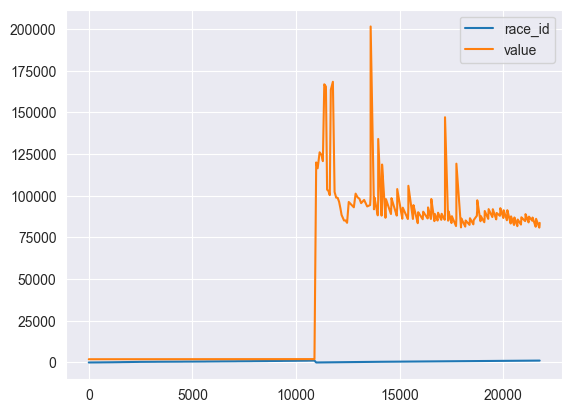